# AIN 214 - PA1 - FALL 2023

BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE AN UNDERSTANDABLE AND TRACBLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED YO COMMENT ON YOUR RESULTS OR EPXLAIN YOUR REASONING. ALSO, PLEASE DO NO HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT, REPORTING IS A KEY STEP IN DATA SCIENCE.

Deadline: 03.11.2023 (23:59:59)

Submission: Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/


# Necessary Imports

In [2]:
import numpy as np
import pandas as pd
from sqlite3 import connect
import sqlite3

# Notes:
* Use pandas dataframe (df) to load the data. 
* Use numpy or pandas operations for the requested tasks unless otherwise specified. Use of naive for loops is not considered valid.
* For the db operations, use sqlite3 library in Python

# 1st Set of Questions on Boston Housing Dataset **(30 Pts)**

* Retrieved from KAGGLE
* **Dataset Path: "Data/BostonHousing.csv"**

## Q1. Basic Data Exploration **(10 Pts)**
1. Load the data into Pandas DataFrame and print the column names. **(1 pts)**
2. Display the first and last 10 rows of the dataset. **(1 pts)**
3. Display random 10 rows. **(1 pts)**
4. Display random 10 rows with a seed, ie, it outputs the same random rows everytime it is run. **(1 pts)**
5. Display every 15th row. **(1 pts)**
6. Get the summary stats of the dataset regarding each column. **(2 pts)**
7. Identify and count the number of missing values in each column. **(3 pts)**

In [3]:
# Load the data into Pandas DataFrame and print the column names
bostonhousing_dataset=pd.read_csv('Data/BostonHousing.csv')
bostonhousing_dataframe=pd.DataFrame(bostonhousing_dataset)
bostonhousing_dataframe

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
# Display the first and last 10 rows of the dataset.
bostonhousing_dataframe.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [5]:
# Display the random 10 rows
bostonhousing_dataframe.sample(n=10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
217,0.07013,0.0,13.89,0,0.550,6.642,85.1,3.4211,5,276,16.4,392.78,9.69,28.7
385,16.81180,0.0,18.10,0,0.700,5.277,98.1,1.4261,24,666,20.2,396.90,30.81,7.2
69,0.12816,12.5,6.07,0,0.409,5.885,33.0,6.4980,4,345,18.9,396.90,8.79,20.9
192,0.08664,45.0,3.44,0,0.437,7.178,26.3,6.4798,5,398,15.2,390.49,2.87,36.4
104,0.13960,0.0,8.56,0,0.520,6.167,90.0,2.4210,5,384,20.9,392.69,12.33,20.1
363,4.22239,0.0,18.10,1,0.770,5.803,89.0,1.9047,24,666,20.2,353.04,14.64,16.8
105,0.13262,0.0,8.56,0,0.520,5.851,96.7,2.1069,5,384,20.9,394.05,16.47,19.5
334,0.03738,0.0,5.19,0,0.515,6.310,38.5,6.4584,5,224,20.2,389.40,6.75,20.7
305,0.05479,33.0,2.18,0,0.472,6.616,58.1,3.3700,7,222,18.4,393.36,8.93,28.4
454,9.51363,0.0,18.10,0,0.713,6.728,94.1,2.4961,24,666,20.2,6.68,18.71,14.9


In [6]:
# sample using seed
seed=20
bostonhousing_dataframe.sample(n=10,random_state=20)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.92,21.2
94,0.04294,28.0,15.04,0,0.464,6.249,77.3,3.6150,4,270,18.2,396.90,10.59,20.6
150,1.65660,0.0,19.58,0,0.871,6.122,97.3,1.6180,5,403,14.7,372.80,14.10,21.5
221,0.40771,0.0,6.20,1,0.507,6.164,91.3,3.0480,8,307,17.4,395.24,21.46,21.7
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
209,0.43571,0.0,10.59,1,0.489,5.344,100.0,3.8750,4,277,18.6,396.90,23.09,20.0
398,38.35180,0.0,18.10,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
31,1.35472,0.0,8.14,0,0.538,6.072,100.0,4.1750,4,307,21.0,376.73,13.04,14.5
235,0.33045,0.0,6.20,0,0.507,6.086,61.5,3.6519,8,307,17.4,376.75,10.88,24.0


In [7]:
# Display every 15th row
bostonhousing_dataframe.iloc[::15]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
15,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
30,1.13081,0.0,8.14,0,0.538,5.713,94.1,4.2330,4,307,21.0,360.17,22.60,12.7
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21,19.3
60,0.14932,25.0,5.13,0,0.453,5.741,66.2,7.2254,8,284,19.7,395.11,13.15,18.7
75,0.09512,0.0,12.83,0,0.437,6.286,45.0,4.5026,5,398,18.7,383.23,8.94,21.4
90,0.04684,0.0,3.41,0,0.489,6.417,66.1,3.0923,2,270,17.8,392.18,8.81,22.6
105,0.13262,0.0,8.56,0,0.520,5.851,96.7,2.1069,5,384,20.9,394.05,16.47,19.5
120,0.06899,0.0,25.65,0,0.581,5.870,69.7,2.2577,2,188,19.1,389.15,14.37,22.0
135,0.55778,0.0,21.89,0,0.624,6.335,98.2,2.1107,4,437,21.2,394.67,16.96,18.1


In [8]:
# Get the summary stats of the dataset regarding each column
bostonhousing_dataframe.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
# Identify and count the number of missing values in each column
eksik_deger_sayisi = bostonhousing_dataframe.isna().sum()
eksik_deger_sayisi

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

## Q2. Data Filtering (10 pts)

1. Extract records where the rm (average number of rooms per dwelling) >= 7.   **(2 pts)**
2. Extract records located along the Charles River (chas = 1) and have a crime rate (crim) less than the median crime rate of the dataset.  **(2 pts)**
3. Identify neighborhoods where the average rm is greater than 6, the lstat (% lower status of the population) is below 10, and the medv is above the 75th percentile of the dataset. This would give neighborhoods with relatively larger homes, lower "lower-status" population percentage, and higher median values.  **(2 pts)**
4. Identify records where the dis (weighted distances to five Boston employment centers) is in the top 10% of the dataset and the nox (nitric oxides concentration) is in the bottom 10%, indicating neighborhoods that are farther from employment centers and have cleaner air.  **(2 pts)**
5. From the houses built before 1940 (AGE column), select those which fall in the top 20% in terms of nitric oxide concentrations (NOX). From this subset, retrieve the bottom 10 records with the lowest MEDV values.  **(2 pts)**

In [10]:
# Extract records where the rm >= 7
bostonhousing_dataframe[bostonhousing_dataframe.rm>=7]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
2,0.02729,0.0,7.07,0,0.4690,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
40,0.03359,75.0,2.95,0,0.4280,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9
55,0.01311,90.0,1.22,0,0.4030,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,3.47428,0.0,18.10,1,0.7180,8.780,82.9,1.9047,24,666,20.2,354.55,5.29,21.9
370,6.53876,0.0,18.10,1,0.6310,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50.0
375,19.60910,0.0,18.10,0,0.6710,7.313,97.9,1.3163,24,666,20.2,396.90,13.44,15.0
453,8.24809,0.0,18.10,0,0.7130,7.393,99.3,2.4527,24,666,20.2,375.87,16.74,17.8


In [11]:
# Extract records located along the Charles River (chas = 1) and have a crime rate (crim) less than the median crime rate of the dataset.
median_crime=bostonhousing_dataframe.crim.median()
bostonhousing_dataframe[(bostonhousing_dataframe.chas == 1)&(bostonhousing_dataframe.crim<median_crime)]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
208,0.13587,0.0,10.59,1,0.4890,6.064,59.1,4.2392,4,277,18.6,381.32,14.66,24.4
210,0.17446,0.0,10.59,1,0.4890,5.960,92.1,3.8771,4,277,18.6,393.25,17.27,21.7
212,0.21719,0.0,10.59,1,0.4890,5.807,53.8,3.6526,4,277,18.6,390.94,16.03,22.4
216,0.04560,0.0,13.89,1,0.5500,5.888,56.0,3.1121,5,276,16.4,392.80,13.51,23.3
218,0.11069,0.0,13.89,1,0.5500,5.951,93.8,2.8893,5,276,16.4,396.90,17.92,21.5
219,0.11425,0.0,13.89,1,0.5500,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
269,0.09065,20.0,6.96,1,0.4640,5.920,61.5,3.9175,3,223,18.6,391.34,13.65,20.7
273,0.22188,20.0,6.96,1,0.4640,7.691,51.8,4.3665,3,223,18.6,390.77,6.58,35.2
274,0.05644,40.0,6.41,1,0.4470,6.758,32.9,4.0776,4,254,17.6,396.90,3.53,32.4
276,0.10469,40.0,6.41,1,0.4470,7.267,49.0,4.7872,4,254,17.6,389.25,6.05,33.2


In [12]:
# Identify neighborhoods where the average rm is greater than 6, the lstat (% lower status of the population) is below 10, and the medv is above 
# the 75th percentile of the dataset. 


# tried to increase the readibility because the name of the dataset is long
average_rm = bostonhousing_dataframe.rm
lstat = bostonhousing_dataframe.lstat
medv = bostonhousing_dataframe.medv
th75_percentile = bostonhousing_dataframe['medv'].quantile(0.75) # the 75th percentile of the dataset


In [13]:

bostonhousing_dataframe[(average_rm>6)&(lstat<10)&(medv>th75_percentile)]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
39,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252,18.3,395.63,4.32,30.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6
353,0.01709,90.0,2.02,0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1
369,5.66998,0.0,18.10,1,0.631,6.683,96.8,1.3567,24,666,20.2,375.33,3.73,50.0
370,6.53876,0.0,18.10,1,0.631,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50.0


In [14]:
# Identify records where the dis (weighted distances to five Boston employment centers) is in the top 10% of the dataset and the nox 
# (nitric oxides concentration) is in the bottom 10%


#tried to increase the readibility because the name of the dataset is long
dis = bostonhousing_dataframe.dis
nox = bostonhousing_dataframe.nox
topTenDis = bostonhousing_dataframe['dis'].quantile(0.9) # bottom of top ten percentage dis 
bottomTenNox = bostonhousing_dataframe['nox'].quantile(0.1) # top of the bottom ten percentage nox


In [15]:
bostonhousing_dataframe[(dis > topTenDis)&(nox < bottomTenNox)]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
54,0.01360,75.0,4.00,0,0.4100,5.888,47.6,7.3197,3,469,21.1,396.90,14.80,18.9
55,0.01311,90.0,1.22,0,0.4030,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
56,0.02055,85.0,0.74,0,0.4100,6.383,35.7,9.1876,2,313,17.3,396.90,5.77,24.7
57,0.01432,100.0,1.32,0,0.4110,6.816,40.5,8.3248,5,256,15.1,392.90,3.95,31.6
64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0
196,0.04011,80.0,1.52,0,0.4040,7.287,34.1,7.3090,2,329,12.6,396.90,4.08,33.3
197,0.04666,80.0,1.52,0,0.4040,7.107,36.6,7.3090,2,329,12.6,354.31,8.61,30.3
198,0.03768,80.0,1.52,0,0.4040,7.274,38.3,7.3090,2,329,12.6,392.20,6.62,34.6
199,0.03150,95.0,1.47,0,0.4030,6.975,15.3,7.6534,3,402,17.0,396.90,4.56,34.9
200,0.01778,95.0,1.47,0,0.4030,7.135,13.9,7.6534,3,402,17.0,384.30,4.45,32.9


In [16]:
# From the houses built before 1940 (age column), select those which fall in the top 20% in terms of nitric oxide concentrations (nox). From this subset,
# retrieve the bottom 10 records with the lowest medv values.


# This time, in order to increase the readability, we filtered the data not in 1 part but in 3 parts

# First filtering
houses_built_before_1940=bostonhousing_dataframe[bostonhousing_dataframe.age>83] # houses built before 1940

#Second filtering
top_20th_nox = houses_built_before_1940['nox'].quantile(0.8) # bottom of top 20 percentage nox 
subset_of_oldHouses = houses_built_before_1940[houses_built_before_1940['nox'] > top_20th_nox] 

#Last filtering
bottom_10th_medv = subset_of_oldHouses['medv'].quantile(0.2) # top of top 10 percentage nox 
final_filtered_data = subset_of_oldHouses[(subset_of_oldHouses['medv'] < bottom_10th_medv)] 
final_filtered_data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
144,2.77974,0.0,19.58,0,0.871,4.903,97.8,1.3459,5,403,14.7,396.90,29.29,11.8
436,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666,20.2,27.49,18.05,9.6
437,15.17720,0.0,18.10,0,0.740,6.152,100.0,1.9142,24,666,20.2,9.32,26.45,8.7
438,13.67810,0.0,18.10,0,0.740,5.935,87.9,1.8206,24,666,20.2,68.95,34.02,8.4
440,22.05110,0.0,18.10,0,0.740,5.818,92.4,1.8662,24,666,20.2,391.45,22.11,10.5
444,12.80230,0.0,18.10,0,0.740,5.854,96.6,1.8956,24,666,20.2,240.52,23.79,10.8
445,10.67180,0.0,18.10,0,0.740,6.459,94.8,1.9879,24,666,20.2,43.06,23.98,11.8
447,9.92485,0.0,18.10,0,0.740,6.251,96.6,2.1980,24,666,20.2,388.52,16.44,12.6


## Q3. Calculate the average per capita crime rate (crim) for each category, "Low", "Medium" or "High" of pupil-teacher ratio (ptratio). **(10 Pts)**
The ptratio is categorized into
* Low if ptratio <= 15
* Medium if 15 < ptratio <= 20
* High if ptratio > 20

In [17]:
#  Calculate the average per capita crime rate (crim) for each category, "Low", "Medium" or "High" of pupil-teacher ratio (ptratio)

# label each record as Low, Medium or High by cut() method, it returns a column (Pandas Series), each element of which tells the label of the record.
labeledData_inTermsOf_ptratio = pd.cut(bostonhousing_dataframe['ptratio'], bins=[0, 15, 20, float('inf')], labels=['Low', 'Medium', 'High'])

# group the original data in terms of "labeledData_inTermsOf_ptratio" pandas series
grouped_data=bostonhousing_dataframe.groupby(labeledData_inTermsOf_ptratio,observed=True)# FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

# do the desired operation on the grouped (labeled) data set
grouped_data['crim'].mean()

ptratio
Low       1.235529
Medium    0.158416
High      8.545540
Name: crim, dtype: float64

# 2nd Set of Questions on the shot1.csv and shot2.csv Datasets **(30 Pts)**

* **Dataset Path: "Data/shot1.csv" and "Data/shot2.csv"**

## Q1. Data Merging and Consistency Checking **(10 Pts)**

* Combine the data from "shot1.csv" and "shot2.csv" into a single DataFrame, ensuring no redundant columns are present. Merge by the redundant column names, representing the same info with different naming.
*  After merging, perform a consistency check for any duplicated rows and provide a summary of your findings. Give the details (avg, mean, etc) of each feature.

In [18]:
# read csv s into dfs 
shot_dataFrame1=pd.read_csv('Data/shot1.csv')
shot_dataFrame2=pd.read_csv('Data/shot2.csv')
shot_dataFrame1

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,SHOT_RESULT
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,1.9,7.7,made
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,0.8,28.2,missed
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,2.7,10.1,missed
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,1.9,17.2,missed
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,2.7,3.7,missed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,5,3,1:52,18.3,5,6.2,8.7,missed
128065,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,6,4,11:28,19.8,4,5.2,0.6,made
128066,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,7,4,11:10,23.0,2,4.2,16.9,made
128067,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,8,4,2:37,9.1,4,4.5,18.3,missed


In [19]:
shot_dataFrame2

,GAME_IDENTIFICATION,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127
128067,21400006,18.3,2,missed,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127


In [20]:
# merge dfs, removing redundant columns

#we make the names of columns with different names but the same content the same, for fast merge
shot_dataFrame2.rename(columns = {'GAME_IDENTIFICATION': 'GAME_ID'},inplace=True) # to make permanent changes
merged_shot_data=pd.merge(shot_dataFrame1, shot_dataFrame2, left_on=['GAME_ID','SHOT_RESULT','SHOT_DIST'],right_on=['GAME_ID','SHOT_RESULT','SHOT_DIST'])
merged_shot_data

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,SHOT_RESULT,PTS_TYPE,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,made,2,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,made,2,"Roberts, Brian",203148,2.9,1,2,jarrett jack,101127
2,21400899,"MAR 04, 2015 - BKN vs. CHA",H,L,-24,5,2,11:06,14.7,5,...,7.7,made,2,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
3,21400899,"MAR 04, 2015 - BKN vs. CHA",H,L,-24,5,2,11:06,14.7,5,...,7.7,made,2,"Roberts, Brian",203148,2.9,1,2,jarrett jack,101127
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,missed,3,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174822,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,5,3,1:52,18.3,5,...,8.7,missed,2,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
174823,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,6,4,11:28,19.8,4,...,0.6,made,2,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
174824,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,7,4,11:10,23.0,2,...,16.9,made,2,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127
174825,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,8,4,2:37,9.1,4,...,18.3,missed,2,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127


In [21]:
# check for duplicate rows and provide a summary of the findings for each feature
merged_shot_data[merged_shot_data.duplicated()] # shows one copy of duplicated rows

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,SHOT_RESULT,PTS_TYPE,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
1884,21400276,"DEC 05, 2014 - CHA vs. NYK",H,W,1,20,4,0:32,15.1,0,...,13.1,missed,2,"Stoudemire, Amar'e",2405,8.1,0,0,al jefferson,2744
1886,21400276,"DEC 05, 2014 - CHA vs. NYK",H,W,1,21,4,0:32,15.1,0,...,13.1,missed,2,"Stoudemire, Amar'e",2405,8.1,0,0,al jefferson,2744
3585,21400409,"DEC 22, 2014 - CHA vs. DEN",H,W,28,7,4,9:06,11.6,3,...,13.8,made,2,"Green, Erick",203475,3.0,1,2,gary neal,202390
3587,21400409,"DEC 22, 2014 - CHA vs. DEN",H,W,28,8,4,9:06,11.6,3,...,13.8,made,2,"Green, Erick",203475,3.0,1,2,gary neal,202390
6839,21400276,"DEC 05, 2014 - CHA vs. NYK",H,W,1,14,4,8:05,12.0,2,...,20.2,missed,2,"Smith, J.R.",2747,2.6,0,0,lance stephenson,202362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168654,21400189,"NOV 22, 2014 - MIN vs. SAC",H,L,-12,9,2,0:53,13.0,14,...,19.1,missed,2,"Sessions, Ramon",201196,3.9,0,0,mo williams,2590
170067,21400385,"DEC 19, 2014 - MIN @ BOS",A,L,-16,8,3,10:54,19.6,1,...,4.1,missed,2,"Sullinger, Jared",203096,2.6,0,0,thaddeus young,201152
170069,21400385,"DEC 19, 2014 - MIN @ BOS",A,L,-16,17,4,3:58,6.0,1,...,4.1,missed,2,"Sullinger, Jared",203096,2.6,0,0,thaddeus young,201152
171950,21400421,"DEC 23, 2014 - BKN vs. DEN",H,W,6,13,4,1:31,4.0,2,...,8.1,missed,2,"Faried, Kenneth",202702,2.1,0,0,mason plumlee,203486


## summary of the findings
* In summary, we found rows with identical data with the duplicated( ) function, and usually each duplicated data is repeated only twice, not more.
* In the merged data i have observed that all the data of a duplicated row are the same with, data of a duplicated row that is two index higher than it, except for the SHOT_NUMBER property.
* for example, the data in the indexes numbered 1884 and 1886 are completely identical except for the SHOT_NUMBER property. This situation shows us that the player has made a shot in the game

In [22]:
#  Give the details (avg, mean, etc) of each feature.

#since we are not asked to drop duplicate rows, we describe them using the merged data which includes duplicate rows
merged_shot_data.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.748270e+05,174827.000000,174827.000000,174827.000000,167418.000000,174827.000000,174827.000000,174827.000000,174827.000000,174827.000000,174827.000000,174827.000000,174827.000000,174827.000000
mean,2.140045e+07,0.213222,6.528397,2.475258,12.567251,1.956420,2.700511,13.652988,2.290830,158897.206124,4.169966,0.447145,0.986810,157519.009958
std,2.567944e+02,13.149961,4.725755,1.141033,5.776454,3.438821,3.003711,9.073547,0.454147,78835.034445,2.814383,0.497200,1.130218,79204.528386
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140024e+07,-8.000000,3.000000,1.000000,8.300000,0.000000,0.800000,4.400000,2.000000,101187.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.400000,0.000000,1.500000,14.000000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.800000,2.000000,3.600000,23.000000,3.000000,203078.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


In [23]:
#since the describe method cannot produce accurate results when there are duplicated rows in the actual data, we drop these lines and describe them again
merged_dropped_shot_data = merged_shot_data.drop_duplicates()
merged_dropped_shot_data.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.747530e+05,174753.000000,174753.000000,174753.000000,167349.000000,174753.000000,174753.000000,174753.000000,174753.000000,174753.000000,174753.000000,174753.000000,174753.000000,174753.000000
mean,2.140045e+07,0.213496,6.527825,2.475122,12.567087,1.956544,2.700657,13.653505,2.290839,158910.239166,4.170358,0.447197,0.986924,157527.022214
std,2.567926e+02,13.150768,4.725423,1.140989,5.776279,3.438927,3.003756,9.073395,0.454151,78825.178909,2.814585,0.497205,1.130234,79198.232583
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140024e+07,-8.000000,3.000000,1.000000,8.300000,0.000000,0.800000,4.400000,2.000000,101187.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.400000,0.000000,1.500000,14.000000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.800000,2.000000,3.600000,23.000000,3.000000,203078.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


## comparison
values that change after the duplicated rows in the data are dropped: mean,std
values of count, min,25%, 50%,75%, max are not changed

## Q2. Player’s Shooting Accuracy Analysis **(10 Pts)**
* Using the combined DataFrame from Question 1, calculate and display the shooting accuracy of each player. 
* Shooting accuracy = the ratio of successful shots (SHOT_RESULT) to total shots taken
* Display the top 5 players based on shooting accuracy

In [24]:
grouped_data = merged_shot_data.groupby(by="player_name")
new_dataSet = grouped_data["SHOT_RESULT"].value_counts().unstack() # we have created columns titled made and missed by using unstack()
new_dataSet["Shooting_Accuracy"]=new_dataSet["made"]/(new_dataSet["made"]+new_dataSet["missed"])
new_dataSet.sort_values(by="Shooting_Accuracy",ascending=False)

SHOT_RESULT,made,missed,Shooting_Accuracy
player_name,,,
deandre jordan,385,137,0.737548
tyson chandler,328,149,0.687631
rudy gobert,254,138,0.647959
greg smith,44,24,0.647059
james johnson,265,158,0.626478
...,...,...,...
matthew dellavedova,94,204,0.315436
vince carter,118,257,0.314667
nate robinson,83,188,0.306273


## Q3. Analyze the Relationship between shooting distance (SHOT_DIST) and shooting success (SHOT_RESULT). **(10 Pts)**
* Bin the shots into categories based on distance. **STATE AND REASON ABOUT YOUR LOGIC HERE!** (How to apply binning)
* Calculate the shooting accuracy for each bin. 
* **COMMENT** on your findinds.

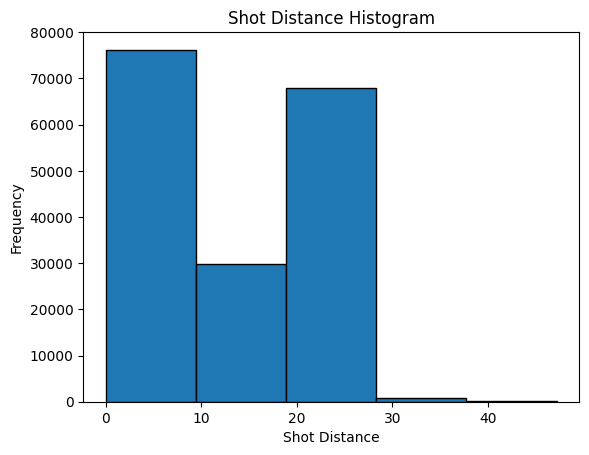

In [25]:
# up_boundry = merged_shot_data["SHOT_DIST"].max() = 47.200000
# bottom_boundry = merged_shot_data["SHOT_DIST"].min() = 0.000000	
# let's find out at which intervals the "shot_distance" data is concentrated and then accordingly determine our "bin" intervals 
import matplotlib.pyplot as plt
plt.hist(merged_shot_data['SHOT_DIST'], bins=5, edgecolor='k')
plt.xlabel('Shot Distance')
plt.ylabel('Frequency')
plt.title('Shot Distance Histogram')
plt.show()

**STATE AND REASON ABOUT YOUR LOGIC**

As can be seen from the histogram, the most shots are shot between 0-10 meters and the least shots are shot between 30-47 meters.

These data show how many parts we need to divide into which shooting distance range:

We will divide the most fired shooting distances more often, we will divide the least fired distances less. 

(Tr:  En çok atış yapılan mesafeleri daha sık aralıklarda böleceğiz, en az  ateş edilen mesafeleri daha az aralıklarda böleceğiz.)

In [26]:
#0-10:[0,2,4,6,8,10] 
#10-20:[10,14,18,22]
#20-30:[22,24,26,28,30]
#30-47:[30,35,47]

bins=[0,2,4,6,8,10,14,18,22,24,26,28,30,35,47]
merged_shot_data["Categories"] = pd.cut(merged_shot_data["SHOT_DIST"],bins=bins)
grouped_data = merged_shot_data.groupby(by="Categories",observed=True) #FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
new_dataSet = grouped_data["SHOT_RESULT"].value_counts().unstack()
new_dataSet["Shooting_Accuracy"]=new_dataSet["made"]/(new_dataSet["made"]+new_dataSet["missed"])
new_dataSet.sort_values(by="Shooting_Accuracy",ascending=False)

SHOT_RESULT,made,missed,Shooting_Accuracy
Categories,,,
"(2, 4]",17729,8723,0.670233
"(0, 2]",8432,4159,0.669685
"(4, 6]",10222,9294,0.523775
"(6, 8]",4944,6911,0.417039
"(14, 18]",5854,8385,0.411124
"(10, 14]",3703,5688,0.394314
"(8, 10]",2915,4820,0.376858
"(18, 22]",7660,12814,0.374133
"(22, 24]",6315,11775,0.349088


**COMMENT**

  * As can be seen from the table above, the most accurate shots were shot between 2-4 meters, while the worst shots were shot between 35-47 meters.
  * An also after 18 meters, as the distance increased the Shooting Accuracy decreased without exception.
  * In the data before 18 meters, there are fluctuations.

# 3rd Set of Questions on SQL - **using sqlite3 library!** **(40 Pts)**

* **Dataset Path: "Data/annots.csv"**

Here you are given a file: annots.csv, with the protein - gene ontology (GO) term associations/annotations. Gene ontology is a framework, representing the properties of genes and proteins. This is basically a Graph - more spesifically a directed acyclic graph (DAG), representing a level-ordered hierarchy with three subgraphs: MF, CC, and BP. Here, **each** node in the graph, which we term as **"GO Term" corresponds to a function of a protein.**

* If protein is annotated with a GO Term, then the protein has the function represented by this GO Term. 
* A protein can be and most of the time is annotated with multiple GO terms, and vice versa. 

In the annots.csv file, we have the annotation data, where each row corresponds to a protein - GO term annotation with the following columns: ProteinID,ProtSeq, GO_ID, Sub_Graph, Level. ProteinID is the specifier of the protein and the ProtSeq is the aminoacid sequence of this protein. GO_ID, Sub_Graph, and Level are properties of a GO Term. 

**Now, we want to store this data in a relational database, with the following table schemas:**

## Table 1: GoTerms:

| Column   | Type    | Key        | Description                |
|----------|---------|------------|----------------------------|
| GoID     | TEXT    | PRIMARY KEY| Gene Ontology Identifier   |
| SubGraph | TEXT    |            | Subgraph Type (BP, MF, CC) |
| Level    | INTEGER |            | Ontology level             |


## Table 2: Proteins

| Column     | Type | Key        | Description                |
|------------|------|------------|----------------------------|
| ProteinID  | TEXT | PRIMARY KEY| Unique Protein Identifier  |
| ProtSeq  | TEXT | | Amino Acid Sequence |

## Table 3: Annotations

| Column    | Type | Key                       | Description               |
|-----------|------|---------------------------|---------------------------|
| GoID      | TEXT | PRIMARY KEY, FOREIGN KEY  | Gene Ontology Identifier  |
| ProteinID | TEXT | PRIMARY KEY, FOREIGN KEY  | Unique Protein Identifier |


## Q1. Read the csv file and create this DB  **(10 Pts)**

In [27]:
# read file into db and create a db using sqlite3
import sqlite3
import csv
conn = sqlite3.connect("Data_Base2.db")
cursor = conn.cursor()

In [28]:
# create our tables
cursor.execute('''
    CREATE TABLE IF NOT EXISTS GoTerms (
        GOID TEXT PRIMARY KEY,
        SubGraph TEXT,
        Level INTEGER
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS Proteins (
        ProteinID TEXT PRIMARY KEY,
        ProtSeq TEXT
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS Annotations (
       GOID TEXT,
       ProteinID TEXT,
       PRIMARY KEY (GOID, ProteinID),
       FOREIGN KEY (GOID) REFERENCES GoTerms(GOID),
       FOREIGN KEY (ProteinID) REFERENCES Proteins(ProteinID)
    )
''')


In [29]:
# transfer the relevant data from the csv file to the tables we have created
with open("Data/annots.csv", "r", newline="") as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)  
    
    for row in csv_reader:
        sql = "INSERT OR IGNORE INTO GoTerms (GOID, SubGraph, Level) VALUES (?, ?, ?)"
        cursor.execute(sql, (row[2], row[3], row[4]))
    csv_file.seek(0)
    next(csv_reader) 
    
    # different way
    data=[]
    for row in csv_reader:
        data.append((row[0], row[1]))        
    sql = "INSERT OR IGNORE INTO Proteins (ProteinID, ProtSeq) VALUES (?, ?)" 
    cursor.executemany(sql, data)

    csv_file.seek(0)
    next(csv_reader) 
    
    for row in csv_reader:
        sql = "INSERT OR IGNORE INTO Annotations (GOID, ProteinID) VALUES (?, ?)"
        cursor.execute(sql, (row[2], row[0])) 
conn.commit()

## Q2. Define a function to extract all GO terms associated with a given amino acid sequence (ProtSeq), ensuring that the GO terms satisfy the following criteria: they are annotated with at least 50 proteins in MF and CC subgraphs, and 100 proteins in the BP subgraph.. **(10 Pts)**

In [30]:
# function to extract the annotated GO terms with the above specs
def extract_go_terms(prot_seq,MF_Threshold,CC_Threshold,BP_Threshold):
    results = []
    # find the GOTHERMS requested from us
    query= '''
    SELECT gt.GOID
    FROM GoTerms gt, Proteins p, Annotations a
    WHERE p.ProtSeq = ?
      AND a.GOID = gt.GOID
      AND a.ProteinID = p.ProteinID
    GROUP BY gt.GOID
    HAVING SUM(CASE WHEN gt.SubGraph = "MF" THEN 1 ELSE 0 END) > ?
           AND SUM(CASE WHEN gt.SubGraph = "CC" THEN 1 ELSE 0 END) > ?
           AND SUM(CASE WHEN gt.SubGraph = "BP" THEN 1 ELSE 0 END) > ?;
    '''
    
    cursor.execute(query, (prot_seq,MF_Threshold,CC_Threshold,BP_Threshold) ) 

    # add to list
    for row in cursor.fetchall():
        results.append(row[0])
    return results

In [31]:
prot_seq = "WYTWADEAHAKNIVMCFRMHGEAYEKAAVYMNRSPEFMGCRADNNDEYDV" #  example protein sequence
BP_Threshold = 100
MF_Threshold = 50
CC_Threshold = 50
print(extract_go_terms(prot_seq,MF_Threshold,CC_Threshold,BP_Threshold))

[]


## Q3. Print the averge number of annotations a GO terms has for each level in each subgraph (MF, CC, and BP) **(10 Pts)**

In [32]:
# Print the avg # of annots
# we reached the GoTerms at each level separately with the nested GROUP BY method
# Using the AVG method, we calculated the averages of each level one by one
query = '''
SELECT gt.SubGraph, gt.Level, AVG(count) 
FROM (
    SELECT g.SubGraph, g.Level, g.GOID, COUNT(DISTINCT a.ProteinID) AS count
    FROM GoTerms g, Annotations a
    WHERE g.GOID = a.GOID  
    GROUP BY g.SubGraph, g.Level, g.GOID 
) AS gt
GROUP BY gt.SubGraph, gt.Level
'''
cursor.execute(query)
pd.read_sql(query,conn)


,SubGraph,Level,AVG(count)
0,BP,0,810.000000
1,BP,1,85.631579
2,BP,2,25.807339
3,BP,3,10.094044
4,BP,4,5.051896
5,BP,5,3.226293
6,BP,6,2.301205
7,BP,7,1.707143
8,BP,8,1.714286
9,BP,9,1.400000


## Q4. Identify the ProteinID with the longest ProtSeq within the Proteins table. Modify its ProtSeq to half its original length by trimming the sequence, update the ProteinID to "trimmed", and display the updated ProteinID and ProtSeq with its GO Term annotations. **(10 Pts)**

In [33]:
# find and trim the longest sequence, displaying the updated ProtID and ProtSeq, and its annotated GO Terms

# find the longest protein sequence
query='''
SELECT p.ProteinID, p.ProtSeq, MAX(LENGTH(p.ProtSeq))
FROM GoTerms gt, Proteins p, Annotations a
WHERE gt.GOID = a.GOID
    AND p.ProteinID = a.ProteinID
'''
cursor.execute(query)
pd.read_sql(query,conn)

,ProteinID,ProtSeq,MAX(LENGTH(p.ProtSeq))
0,A0A026W182,PINRSTMFFSFSNYPAILTPAMYDIKGWIGGWLQNHLPESIRGGCS...,70


In [34]:
# trim the longest protein sequence we found
query1='''
UPDATE Proteins
SET ProtSeq = SUBSTR(ProtSeq, 1, LENGTH(ProtSeq) / 2)
WHERE ProteinID = ?;
'''

cursor.execute(query)
longest_protein_id=cursor.fetchall()
protein_id = longest_protein_id[0][0]
cursor.execute(query1, (protein_id,))

# find all GO Term annotations of the longest protein sequence we found
query2='''
SELECT p.ProteinID, p.ProtSeq, gt.GOID, gt.SubGraph, gt.Level
FROM Proteins p, GoTerms gt, Annotations a
WHERE a.GOID = gt.GOID
      AND a.ProteinID = p.ProteinID
      AND p.ProteinID = ?
'''
cursor.execute(query2, (protein_id,))
cursor.fetchall()

# In the following code, the protein IDs and protein sequences in all rows are equal. The only difference is the GOIDS

[('A0A026W182', 'PINRSTMFFSFSNYPAILTPAMYDIKGWIGGWLQN', 'GO:0051716', 'BP', 2),
 ('A0A026W182', 'PINRSTMFFSFSNYPAILTPAMYDIKGWIGGWLQN', 'GO:0003008', 'BP', 2),
 ('A0A026W182', 'PINRSTMFFSFSNYPAILTPAMYDIKGWIGGWLQN', 'GO:0050907', 'BP', 4),
 ('A0A026W182', 'PINRSTMFFSFSNYPAILTPAMYDIKGWIGGWLQN', 'GO:0050877', 'BP', 3),
 ('A0A026W182', 'PINRSTMFFSFSNYPAILTPAMYDIKGWIGGWLQN', 'GO:0048736', 'BP', 3),
 ('A0A026W182', 'PINRSTMFFSFSNYPAILTPAMYDIKGWIGGWLQN', 'GO:0023052', 'BP', 3),
 ('A0A026W182', 'PINRSTMFFSFSNYPAILTPAMYDIKGWIGGWLQN', 'GO:0005549', 'MF', 2),
 ('A0A026W182', 'PINRSTMFFSFSNYPAILTPAMYDIKGWIGGWLQN', 'GO:0043695', 'BP', 4),
 ('A0A026W182', 'PINRSTMFFSFSNYPAILTPAMYDIKGWIGGWLQN', 'GO:0048856', 'BP', 2),
 ('A0A026W182', 'PINRSTMFFSFSNYPAILTPAMYDIKGWIGGWLQN', 'GO:0009987', 'BP', 1),
 ('A0A026W182', 'PINRSTMFFSFSNYPAILTPAMYDIKGWIGGWLQN', 'GO:0005488', 'MF', 1),
 ('A0A026W182', 'PINRSTMFFSFSNYPAILTPAMYDIKGWIGGWLQN', 'GO:0051606', 'BP', 2),
 ('A0A026W182', 'PINRSTMFFSFSNYPAILTPAMYDIKGWIGGWLQN

# PLAGIARISM
All work on assignments must be done individually. You are encouraged to discuss
the given assignments with your classmates, but these discussions should be carried out
in an abstract way. That is, discussions related to a particular solution to a specific prob-
lem (either in actual code or in pseudocode) will not be tolerated. In short, turning
in someone else’s work (including work available on the internet), in whole or in part, as
your own will be considered as a violation of academic integrity. Please note that the
former conditions also hold for the material attained using AI tools, including ChatGPT,
GitHub Copilot, etc.